# IndiaCensus

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
%matplotlib notebook
import plotly.plotly as py
import plotly.graph_objs as go

In [3]:
census = pd.read_csv("./dataset/india-districts-census-2011.csv")
data = census

In [4]:
df = pd.DataFrame(data)

In [5]:
#Checking the Column names
df.columns

Index(['District code', 'State name', 'District name', 'Population', 'Male',
       'Female', 'Literate', 'Male_Literate', 'Female_Literate', 'SC',
       ...
       'Power_Parity_Rs_90000_150000', 'Power_Parity_Rs_45000_150000',
       'Power_Parity_Rs_150000_240000', 'Power_Parity_Rs_240000_330000',
       'Power_Parity_Rs_150000_330000', 'Power_Parity_Rs_330000_425000',
       'Power_Parity_Rs_425000_545000', 'Power_Parity_Rs_330000_545000',
       'Power_Parity_Above_Rs_545000', 'Total_Power_Parity'],
      dtype='object', length=118)

# # 1. Create a geographic map of states with low literacy rates.

In [7]:
# For Litracy rate we need the State names,Population and the number of Litrates (captured in temp)
temp = df[['State name','Population','Literate']]

In [9]:
# A check is made if any Null values are in the dataset(temp)
temp.isnull().any()

State name    False
Population    False
Literate      False
dtype: bool

In [12]:
# To find the Unique values in states name so that there are no redundancy (as we are considering state Litracy rate)
state = list(temp['State name'].unique())
temp[temp["State name"]==state[1]]

,State name,Population,Literate
22,HIMACHAL PRADESH,519080,323842
23,HIMACHAL PRADESH,1510075,1152640
24,HIMACHAL PRADESH,31564,21845
25,HIMACHAL PRADESH,437903,307672
26,HIMACHAL PRADESH,999777,723747
27,HIMACHAL PRADESH,454768,358091
28,HIMACHAL PRADESH,521173,399715
29,HIMACHAL PRADESH,381956,287620
30,HIMACHAL PRADESH,580320,428578
31,HIMACHAL PRADESH,529855,362645


In [14]:
def states_name_pop(name):
    state_name =  temp[temp["State name"]== name]
    popul      =  np.sum(state_name["Population"].astype("float"))
    literates  =  np.sum(state_name['Literate'].astype('float'))
    lr         =  (literates/popul)*100
    return(popul,literates,lr)   

In [15]:
combined = []
for i in range(len(state)):
    name = state[i]
    [popul,literates,lr] = states_name_pop(name)
    combined.append([i+1,name,popul,literates,lr])


In [17]:
lr = pd.DataFrame(combined,columns=['State code','state_name','Population','Literates','literacy_rate'])
lr

,State code,state_name,Population,Literates,literacy_rate
0,1,JAMMU & KASHMIR,12541302.0,7067233.0,56.351669
1,2,HIMACHAL PRADESH,6864602.0,5039736.0,73.416288
2,3,PUNJAB,27743338.0,18707137.0,67.429294
3,4,CHANDIGARH,1055450.0,805438.0,76.312284
4,5,UTTARAKHAND,10086292.0,6880953.0,68.220839
5,6,HARYANA,25351462.0,16598988.0,65.475466
6,7,NCT OF DELHI,16787941.0,12737767.0,75.874504
7,8,RAJASTHAN,68548437.0,38275282.0,55.836841
8,9,UTTAR PRADESH,199812341.0,114397555.0,57.252497
9,10,BIHAR,104099452.0,52504553.0,50.436916


In [19]:
#Considering a treshold vlaue below which its low litracy rate 
treshold_lr =  lr['literacy_rate'].mean()
lr1         =  lr[lr['literacy_rate']< 67]

In [20]:
lr1

,State code,state_name,Population,Literates,literacy_rate
0,1,JAMMU & KASHMIR,12541302.0,7067233.0,56.351669
5,6,HARYANA,25351462.0,16598988.0,65.475466
7,8,RAJASTHAN,68548437.0,38275282.0,55.836841
8,9,UTTAR PRADESH,199812341.0,114397555.0,57.252497
9,10,BIHAR,104099452.0,52504553.0,50.436916
11,12,ARUNACHAL PRADESH,1383727.0,766005.0,55.358102
13,14,MANIPUR,2855794.0,1908476.0,66.828210
16,17,MEGHALAYA,2966889.0,1785005.0,60.164199
17,18,ASSAM,31205576.0,19177977.0,61.456892
19,20,JHARKHAND,32988134.0,18328069.0,55.559581


In [22]:
#As the number of states below average literacy rate was high, a lower treshold had to be set
treshold = lr1['literacy_rate'].mean()
treshold

59.930789911131214

In [23]:
lr1=lr1[lr1['literacy_rate']< 59]
lr1=lr1.reset_index(drop=True)

In [25]:
# States that have low literacy rate 
lr1

,State code,state_name,Population,Literates,literacy_rate
0,1,JAMMU & KASHMIR,12541302.0,7067233.0,56.351669
1,8,RAJASTHAN,68548437.0,38275282.0,55.836841
2,9,UTTAR PRADESH,199812341.0,114397555.0,57.252497
3,10,BIHAR,104099452.0,52504553.0,50.436916
4,12,ARUNACHAL PRADESH,1383727.0,766005.0,55.358102
5,20,JHARKHAND,32988134.0,18328069.0,55.559581


<IPython.core.display.Javascript object>


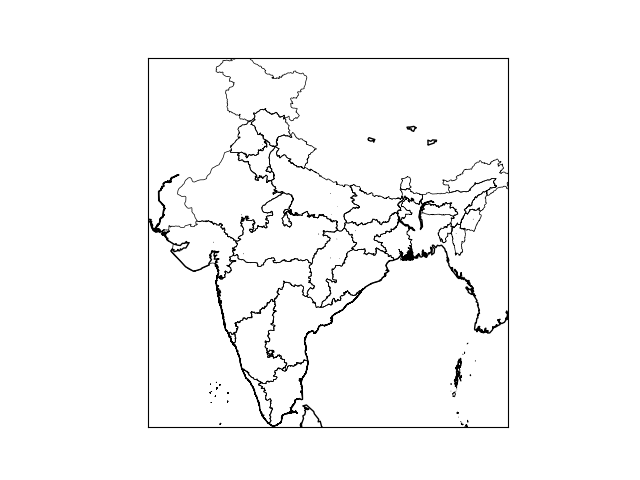

In [28]:
# create the map
#Initial a base map of the world is created and then its cropped to get INDIA with longitude and lattitude values

m = Basemap(llcrnrlon=67,llcrnrlat=8,urcrnrlon=97,urcrnrlat=37,
        projection='mill',resolution='l')
# Settting the borders of the coast line
m.drawcoastlines()

#Ignoring the border lines of nearby countries
m.drawcountries(linewidth=0)

#Creating the state borders using the INDIA sh file 
m.drawstates(linewidth=5)
m.readshapefile('./INDIA',name='states', drawbounds=True)

# The look and feel of the above created map with state names 
plt.show()
#print(stnames)

In [29]:
state_names = []
for shape_dict in m.states_info:
    state_names.append(shape_dict['ST_NAME'])

In [31]:
# The list of state names that are in the SH file.(The strings )s
stnames = list(set(state_names))
stnames

['Maharashtra',
 'Haryana',
 'Tamil Nadu',
 'DADRA AND NAGAR HAVELI',
 'Nct Of Delhi',
 'Punjab',
 'Manipur',
 'DAMAN AND DIU',
 'CHANDIGARH',
 'Meghalaya',
 'Pondicherry',
 'Jharkhand',
 'Rajasthan',
 'Karnataka',
 'Madhya Pradesh',
 'LAKSHADWEEP',
 'Mizoram',
 'Uttar Pradesh',
 'Himachal Pradesh',
 'Chhattisgarh',
 'Arunachal Pradesh',
 'Assam',
 'Kerala',
 'Andhra Pradesh',
 'Orissa',
 'Nagaland',
 'ANDAMAN AND NICOBAR ISLANDS',
 'Tripura',
 'Jammu And Kashmir',
 'Sikkim',
 'Uttarakhand',
 'Gujarat',
 'Goa',
 'West Bengal',
 'Bihar']

In [33]:
ns = np.array(lr1['state_name'])
tempName=[]
for i in ns:
    for k in stnames:
        if fuzz.ratio(i.lower(),k.lower())>80:
            tempName.append(k)
            #print(k)
            break

<IPython.core.display.Javascript object>


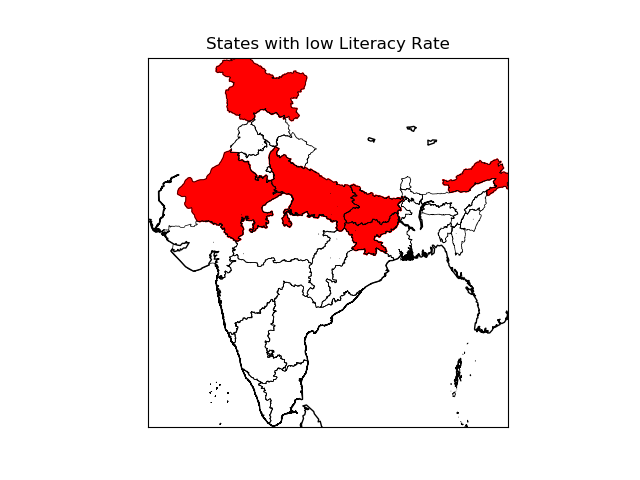

In [36]:
# A geographic map of states with low literacy rates.
m = Basemap(llcrnrlon=67,llcrnrlat=8,urcrnrlon=97,urcrnrlat=37,
        projection='mill',resolution='l')
m.drawcoastlines()
m.drawcountries(linewidth=0)
m.drawstates(linewidth=5)
m.readshapefile('INDIA',name='states', drawbounds=True)

ax = plt.gca() # get current axes instance

for i in tempName:
    
    seg = m.states[state_names.index(i)]
    poly = Polygon(seg, facecolor='red',edgecolor='red')
    ax.add_patch(poly)
plt.show()
plt.title("States with low Literacy Rate")
plt.legend()
#print(stnames)

# 2. Find out most similar districts in Bihar and Tamil Nadu. 

In [37]:
br_tn = df

In [39]:
# Extracting of Bihar and Tamil Nadu from the dataset
temp_br = br_tn[br_tn['State name']=='BIHAR'] 
temp_tn = br_tn[br_tn['State name']=='TAMIL NADU']
temp_br = temp_br.reset_index(drop=True)
temp_tn = temp_tn.reset_index(drop=True)

In [41]:
# For coloumns Literates,Agricultural_workers and the District name
br_lt   = np.array(temp_br['Literate'].astype("float"))
br_nW   = np.array(temp_br['Agricultural_Workers'].astype("float"))
br_name = np.array(temp_br['District name'])

In [42]:
tn_lt = np.array(temp_tn['Literate'].astype("float"))
tn_nW = np.array(temp_tn['Agricultural_Workers'].astype("float"))
tn_name = np.array(temp_tn['District name'])

In [43]:
X = np.concatenate((br_lt,tn_lt))
Y = np.concatenate((br_nW,tn_nW))
Z = np.concatenate((br_name,tn_name))

In [44]:
# PLotting the each districts of both the states to check the overlapping districts implying that they are sililar

In [45]:
trace0 = go.Scatter(
    x = br_lt,
    y = br_nW,
    text = br_name,
    name = 'BIHAR',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(255, 0, 0, .5)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace1 = go.Scatter(
    x = tn_lt,
    y = tn_nW,
    text = tn_name,
    name = 'TAMIL NADU',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(0,255,0,.5)',
        line = dict(
            width = 2,
        )
    )
)

data = [trace0, trace1]

In [46]:
layout = go.Layout(
    title='Most Similar Districts',
    xaxis=dict(
            title='Literate',
            titlefont=dict(
            family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        ),
        yaxis=dict(
            title='Agricultural_Workers',
            titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
            )
    
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='hover-chart-basic')

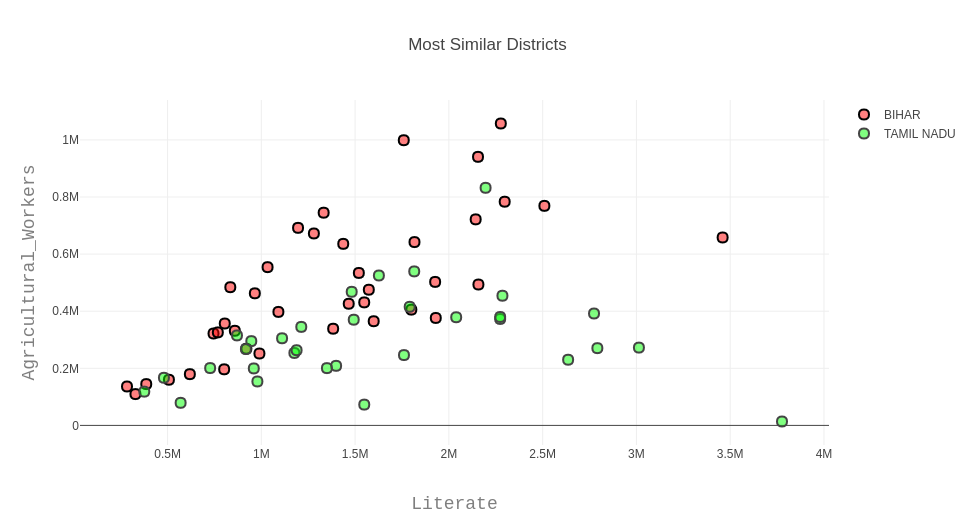

In [1]:
from IPython.display import Image
Image(filename='a.png')

Districts that are similar are [Ariyalur(TN) with Lakhisarai(Br)][Tanjavur(TN) with Rothas(Br)][Jamui(Br) with Theni(TN)]

# 3. How does the mobile penetration vary in regions (districts or states) with high or low agricultural workers

In [47]:
def mobile(name,df):
    state_name =  df[df["State name"]== name]
    mob        =  np.sum(state_name["Households_with_Telephone_Mobile_Phone_Mobile_only"].astype("float"))
    agr        =  np.sum(state_name['Agricultural_Workers'].astype("float"))
    #lr         =  (literates/popul)*100
    return (mob,agr)  

In [48]:
comb = []
for i in range(len(state)):
    name = state[i]
    [mob,agr] = mobile(name,df)
    comb.append([name,mob,agr])

In [50]:
# Extratecd the statenames, Households with mobile phones ,and the agricultural workers
mt = pd.DataFrame(comb,columns=['state_name','mobile','agr'])

In [51]:
xx = np.array(mt['mobile'].astype("float"))
yy = np.array(mt['agr'].astype("float"))
nN = np.array(mt['state_name'])

In [59]:
trace1 = go.Bar(
    x = nN,
    y = xx,
    name='mobile_peneration'
)
trace2 = go.Bar(
    x = nN,
    y = yy,
    name='agriculture'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title='Mobile_pentration',
    xaxis=dict(
        title='Mobile',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Agriculture workers',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Mobile_pentration')

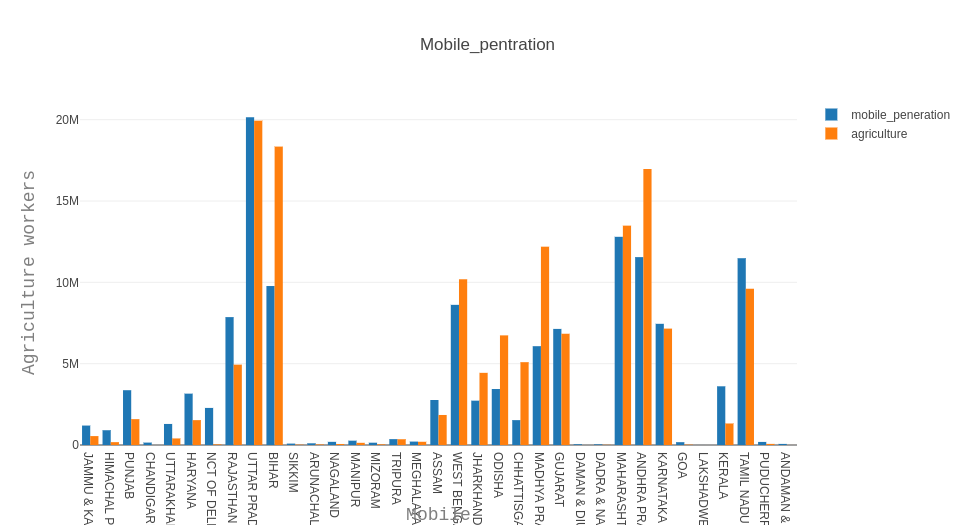

In [3]:
Image(filename='b.png')

The vairation of mobile penetration is shown in the above graph